# **Content-Based Recommendation System Implementation**
A content-based recommendation system revolves around a user’s profiles. It is based on the user’s ratings including the number of times a user has clicked on different items or even liked those items. The recommendations are based on the similarity between those items.
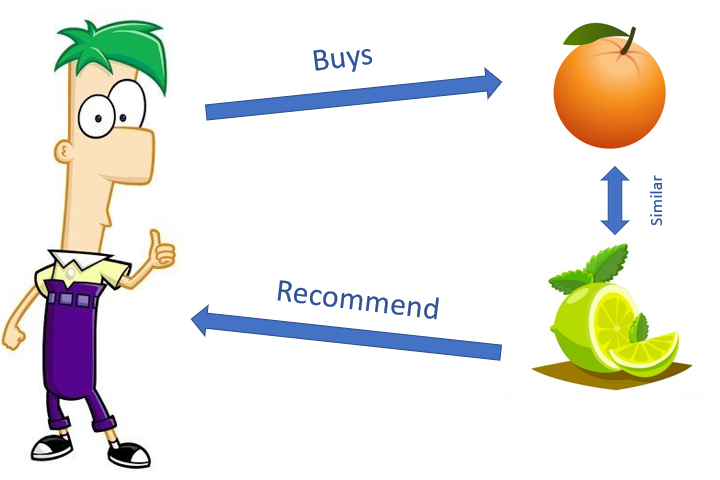

# Libraries used
* Pandas
* Matplotlib
* Seaborn

# Implementing a content-based movie recommendation system
 We’ll be making a movie recommendation system which is based on ratings given to a movie by different users.
Start by importing the necessary libraries:

In [1]:
import numpy as np
import pandas as pd

## Data Preparation
Recommendation systems require a very large dataset. For this model, we’ll be using a dataset of 100k movies. Load the dataset. The columns of this data frame do not have names. So, we’ll give a name to every column.


In [2]:
columns_name=['user_id','item_id','rating','timestamp']
df=pd.read_csv("../input/movielens-100k-dataset/ml-100k/u.data",sep="\t",names=columns_name)        
#u.data is a tsv file (tab separated values)
print(df.head())
df.shape

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


(100000, 4)

People are given user ids and movies are given item ids. Every person has rated one or more than one movie.
This data frame, however, does not tell which item id corresponds to which movie name. To get the names of movies, we’ll load another dataset (both these datasets are available in the file downloaded earlier).

In [3]:
movies=pd.read_csv("../input/movielens-100k-dataset/ml-100k/u.item",sep="\|",header= None)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [4]:
print(movies.shape)
movies.head()

(1682, 24)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
#There are 24 columns bit we just need to extract two columns from this dataset to get the movie names corresponding to each item_id
movies=movies[[0,1]]
movies.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
#Give column names to the columns of this data frame also.
movies.columns=['item_id','title'] 
movies.head(1)

,item_id,title
0,1,Toy Story (1995)


### merging both dataframes

In [7]:
df=pd.merge(df,movies,on="item_id")

### As already mentioned, one user has rated one or more than one movie. This means that one movie has been rated by more than one user. We’ll have to find the average rating of each movie to get some meaningful data.

In [8]:
df.groupby("title").mean()['rating'].sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de d�cembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

### Movies with a rating of exactly 5 or 1 are likely to have been reviewed by only 1 or 2 people because when more number of people rate a movie, the average cannot be a perfect 5 or 1. Any movie which has been rated by only a few people cannot be recommended to a user. Let’s slowly get rid of these movies which have been recommended by very few users. Start with finding out the number of ratings a particular movie has received.

In [9]:
df.groupby("title").count()["rating"].sort_values(ascending=False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
� k�ldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

Now that we have both the attributes (average rating and number of ratings) for every movie, let’s create a separate data frame for them.

In [10]:
ratings=pd.DataFrame(df.groupby("title").mean()['rating'])
ratings['number of ratings']=pd.DataFrame(df.groupby("title").count()["rating"])
print(ratings.head())

                             rating  number of ratings
title                                                 
'Til There Was You (1997)  2.333333                  9
1-900 (1994)               2.600000                  5
101 Dalmatians (1996)      2.908257                109
12 Angry Men (1957)        4.344000                125
187 (1997)                 3.024390                 41


In [11]:
ratings.sort_values(by='rating', ascending=False)

,rating,number of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


## Exploratory Data Analysis
Now we have the final data frame that we’ll be using to make our prediction model. But before that, it’s time for some data visualization. Enter matplotlib and seaborn!


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

Let’s plot a histogram of number of ratings to check the distribution.

<function matplotlib.pyplot.show(*args, **kw)>

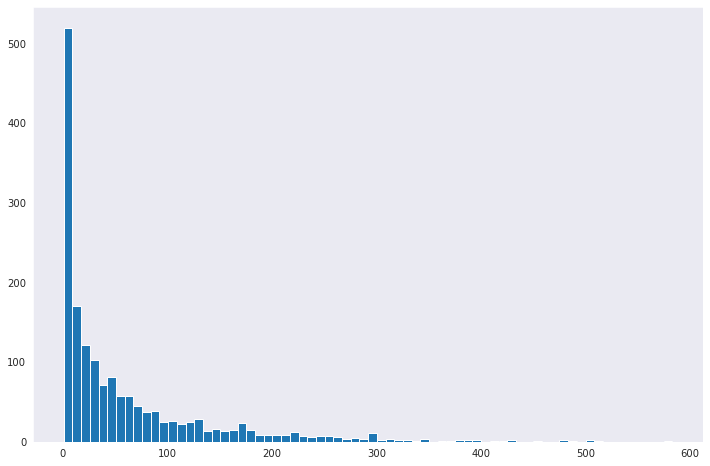

In [13]:
plt.figure(figsize=(12,8))
plt.hist(ratings['number of ratings'], bins=70,)
plt.show


Looks neat! Along the x-axis, we have the number of times movies have been rated. Along the y-axis, we have how many movies have been rated those number of times. For example, the number of movies that have been rated by 0–10 people are more than 500
Now let’s plot another histogram. This time it id going to be a histogram of average ratings.

<function matplotlib.pyplot.show(*args, **kw)>

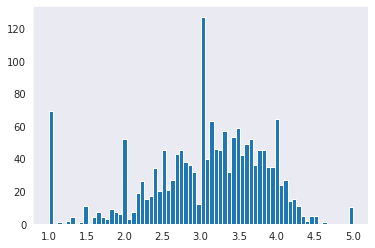

In [14]:
plt.hist(ratings['rating'],bins=70)
plt.show

Along the x-axis, we have the average movie ratings and along the y-axis, we have the number of movies. This is kind of a normal distribution.
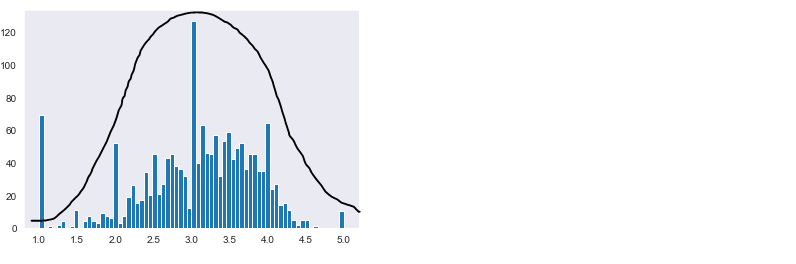

And now a final plot!

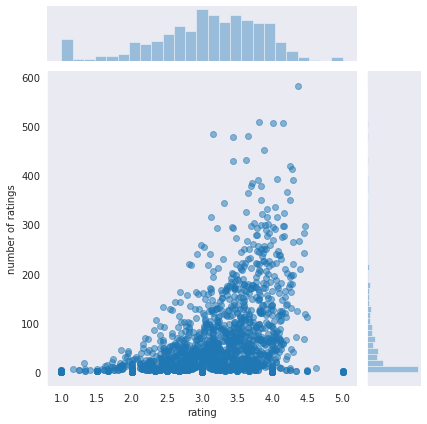

In [15]:
sns.jointplot(x='rating',y='number of ratings',data=ratings,alpha=0.5)

The above plot shows that as the rating increases, the number of ratings of that movie also increases. In addition to it, the figure clearly depicts the movies which have been rated by very few people by isolated dots (ends of the x-axis).

## Recommendation system with reference to a particular movie

We’ll implement our recommendation model for a single movie at first. Let’s pick Star Wars (1977).
First, make a matrix to shows which user has given what rating to which movie. There are a lot of NaN values because all the users have not watched all the movies.

In [16]:
moviematrix=df.pivot_table(index="user_id",columns="title",values='rating')
print(moviematrix)

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
5                              NaN           NaN                    2.0   
...                            ...           ...                    ...   
939                            NaN           NaN                    NaN   
940                            NaN           NaN                    NaN   
941                            NaN           NaN                    NaN   
942                            NaN           NaN                    NaN   
943                            NaN           NaN                    NaN   

title    12 Angry Men (1

From this matrix let’s extract Star War’s information

In [17]:
starwars_user_ratings=moviematrix['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

Now we will find out that what ratings have been given to other movies by the users who have rated Star Wars

In [18]:
#finding correlation of starwars movie withh all other movies
similar_to_starwars=moviematrix.corrwith(starwars_user_ratings)    

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [19]:
similar_to_starwars


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
� k�ldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

There are NaN values corresponding to the movies which have not been rated along with star wars or vice versa since correlation does not exist.
Next, we’ll make a separate data frame for movies and their correlation with the movie Star Wars.

In [20]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['correlation'])
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


The basic idea behind this is that if a person likes Star Wars, he/she can be recommended the movie with the highest correlation.
We had NaN values in our data frame. We’ll remove those using dropna( ) function.

In [21]:
corr_starwars.dropna(inplace=True)

Let’s take a little look at our data.

In [22]:
corr_starwars.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [23]:
corr_starwars=corr_starwars.join(ratings['number of ratings'])

In [24]:
corr_starwars.head()

,correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


## If 6 people have rated the movie Hollow Reed as 5 and the same people out of 583 people have rated Star Wars as 5, then both of these movies have a correlation of 1. But this data is not meaningful as very few people have rated Hollow Reed. To overcome this, we will put a threshold at 100 people so that only the movies that have been watched by more than 100 people are recommended. Here, the movie with the title ’Til There was You (1997) cannot be recommended as it has been rated by only 9 people.

In [25]:
corr_starwars[corr_starwars['number of ratings']>100].sort_values('correlation',ascending=False)

,correlation,number of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


Now, this data looks pretty good as only movies that have been rated by more than 100 people will be recommended.
# MAKING THE RECOMMENDATION FUNCTION
Let’s make a general recommendation function now which will give us 5 movie recommendations based on the movie we enter.

In [26]:
def predict_movies(movie_name):
    movie_user_ratings=moviematrix[movie_name]
    similar_to_movie=moviematrix.corrwith(movie_user_ratings)
    corr_movie=pd.DataFrame(similar_to_movie,columns=['correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['number of ratings'])
    predictions=corr_movie[corr_movie['number of ratings']>100].sort_values('correlation',ascending=False)
    return predictions
predictions=predict_movies("As Good As It Gets (1997)")  #any movie name from the data set can be put here
predictions.head()

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,number of ratings
title,,
As Good As It Gets (1997),1.000000,112
Apt Pupil (1998),0.701931,160
"Mask, The (1994)",0.618215,129
Batman Forever (1995),0.587782,114
Glory (1989),0.533915,171


This was a content-based recommendation system that we made using very basic python libraries. The ones used in real life are way more complicated. This was just to give you some idea about recommendation systems.